In [54]:
#I took help from Devashish Khulbe and Soham to extract the hour from the date as well as use the loc function.
#Otherwise I used Dr.Bianco's notebook as a guideline for this work. 
# A couple code lines required taking code from the internet - those instances have been cited.

In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

Populating the interactive namespace from numpy and matplotlib


In [2]:
datestring_feb = '201602'
getCitiBikeCSV(datestring_feb)
datestring_july = '201607'
getCitiBikeCSV(datestring_july)

file in place, you can continue
file in place, you can continue


In [44]:
alpha = 0.05

In [3]:
feb_df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring_feb + '-citibike-tripdata.csv')
feb_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,461,2/1/2016 00:00:08,2/1/2016 00:07:49,480,W 53 St & 10 Ave,40.766697,-73.990617,524,W 43 St & 6 Ave,40.755273,-73.983169,23292,Subscriber,1966.0,1
1,297,2/1/2016 00:00:56,2/1/2016 00:05:53,463,9 Ave & W 16 St,40.742065,-74.004432,380,W 4 St & 7 Ave S,40.734011,-74.002939,15329,Subscriber,1977.0,1
2,280,2/1/2016 00:01:00,2/1/2016 00:05:40,3134,3 Ave & E 62 St,40.763126,-73.965269,3141,1 Ave & E 68 St,40.765005,-73.958185,22927,Subscriber,1987.0,1
3,662,2/1/2016 00:01:00,2/1/2016 00:12:02,537,Lexington Ave & E 24 St,40.740259,-73.984092,428,E 3 St & 1 Ave,40.724677,-73.987834,20903,Subscriber,1983.0,2
4,355,2/1/2016 00:01:41,2/1/2016 00:07:36,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,521,8 Ave & W 31 St,40.750967,-73.994442,23228,Subscriber,1978.0,1


In [4]:
july_df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring_july + '-citibike-tripdata.csv')
july_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,704,7/1/2016 00:00:02,7/1/2016 00:11:47,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,17431,Customer,NaN,0
1,492,7/1/2016 00:00:18,7/1/2016 00:08:31,293,Lafayette St & E 8 St,40.730287,-73.990765,466,W 25 St & 6 Ave,40.743954,-73.991449,24159,Subscriber,1984.0,1
2,191,7/1/2016 00:00:19,7/1/2016 00:03:31,3090,N 8 St & Driggs Ave,40.717746,-73.956001,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,16345,Subscriber,1986.0,2
3,687,7/1/2016 00:00:24,7/1/2016 00:11:52,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,25210,Customer,NaN,0
4,609,7/1/2016 00:00:31,7/1/2016 00:10:40,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,212,W 16 St & The High Line,40.743349,-74.006818,15514,Customer,NaN,0


In [5]:
df = pd.concat([feb_df, july_df])

# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,461,2/1/2016 00:00:08,2/1/2016 00:07:49,480,W 53 St & 10 Ave,40.766697,-73.990617,524,W 43 St & 6 Ave,40.755273,-73.983169,23292,Subscriber,1966.0,1,2016-02-01 00:00:08
1,297,2/1/2016 00:00:56,2/1/2016 00:05:53,463,9 Ave & W 16 St,40.742065,-74.004432,380,W 4 St & 7 Ave S,40.734011,-74.002939,15329,Subscriber,1977.0,1,2016-02-01 00:00:56
2,280,2/1/2016 00:01:00,2/1/2016 00:05:40,3134,3 Ave & E 62 St,40.763126,-73.965269,3141,1 Ave & E 68 St,40.765005,-73.958185,22927,Subscriber,1987.0,1,2016-02-01 00:01:00
3,662,2/1/2016 00:01:00,2/1/2016 00:12:02,537,Lexington Ave & E 24 St,40.740259,-73.984092,428,E 3 St & 1 Ave,40.724677,-73.987834,20903,Subscriber,1983.0,2,2016-02-01 00:01:00
4,355,2/1/2016 00:01:41,2/1/2016 00:07:36,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,521,8 Ave & W 31 St,40.750967,-73.994442,23228,Subscriber,1978.0,1,2016-02-01 00:01:41


In [22]:
df.columns

Index(['level_0', 'index', 'tripduration', 'starttime', 'stoptime',
       'start station id', 'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date', 'start_hour'],
      dtype='object')

In [29]:
df = df.drop(['level_0', 'index', 'stoptime', 'start station latitude', 'start station longitude', 'end station id', 'end station name', 'end station latitude', 'end station longitude', 'bikeid', 'usertype', 'gender', 'birth year'], axis=1)

In [30]:
df.head(4)

,tripduration,starttime,start station id,start station name,date,start_hour
0,461,2/1/2016 00:00:08,480,W 53 St & 10 Ave,2016-02-01 00:00:08,0
1,297,2/1/2016 00:00:56,463,9 Ave & W 16 St,2016-02-01 00:00:56,0
2,280,2/1/2016 00:01:00,3134,3 Ave & E 62 St,2016-02-01 00:01:00,0
3,662,2/1/2016 00:01:00,537,Lexington Ave & E 24 St,2016-02-01 00:01:00,0


# SPLIT BY CATEGORY

as an example I am splitting data by time of day (day or night):

**H0: there is no statistical difference in the duration of bike rides in the day and in the night**
$$ \alpha = 0.05 $$

extracting the hour happens in the cell below

In [31]:
df['start_hour'] = df['date'].dt.hour
df.tail(4)

,tripduration,starttime,start station id,start station name,date,start_hour
1940980,1056,7/31/2016 23:59:13,487,E 20 St & FDR Drive,2016-07-31 23:59:13,23
1940981,845,7/31/2016 23:59:14,284,Greenwich Ave & 8 Ave,2016-07-31 23:59:14,23
1940982,428,7/31/2016 23:59:53,387,Centre St & Chambers St,2016-07-31 23:59:53,23
1940983,330,7/31/2016 23:59:59,507,E 25 St & 2 Ave,2016-07-31 23:59:59,23


In [32]:
df.reset_index(inplace=True)

In [33]:
day = (6,19)

In [34]:
df['start_hour'][0]

0

In [35]:
df['duration_day'] = (df.start_hour.values > day[0]) & (df.start_hour.values < day[1])

In [36]:
df.head(4)

,index,tripduration,starttime,start station id,start station name,date,start_hour,duration_day
0,0,461,2/1/2016 00:00:08,480,W 53 St & 10 Ave,2016-02-01 00:00:08,0,False
1,1,297,2/1/2016 00:00:56,463,9 Ave & W 16 St,2016-02-01 00:00:56,0,False
2,2,280,2/1/2016 00:01:00,3134,3 Ave & E 62 St,2016-02-01 00:01:00,0,False
3,3,662,2/1/2016 00:01:00,537,Lexington Ave & E 24 St,2016-02-01 00:01:00,0,False


In [37]:
day_df = df.loc[df['duration_day'] == True]
day_df.head(4)
# https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html

,index,tripduration,starttime,start station id,start station name,date,start_hour,duration_day
1282,1282,1031,2/1/2016 07:00:00,3173,Riverside Blvd & W 67 St,2016-02-01 07:00:00,7,True
1283,1283,196,2/1/2016 07:00:05,3140,1 Ave & E 78 St,2016-02-01 07:00:05,7,True
1284,1284,351,2/1/2016 07:00:06,345,W 13 St & 6 Ave,2016-02-01 07:00:06,7,True
1285,1285,1513,2/1/2016 07:00:12,487,E 20 St & FDR Drive,2016-02-01 07:00:12,7,True


In [38]:
night_df = df.loc[df['duration_day'] == False]
night_df.head(4)

,index,tripduration,starttime,start station id,start station name,date,start_hour,duration_day
0,0,461,2/1/2016 00:00:08,480,W 53 St & 10 Ave,2016-02-01 00:00:08,0,False
1,1,297,2/1/2016 00:00:56,463,9 Ave & W 16 St,2016-02-01 00:00:56,0,False
2,2,280,2/1/2016 00:01:00,3134,3 Ave & E 62 St,2016-02-01 00:01:00,0,False
3,3,662,2/1/2016 00:01:00,537,Lexington Ave & E 24 St,2016-02-01 00:01:00,0,False


In [39]:
df.describe()

,index,tripduration,start station id,start_hour
count,1.940984e+06,1.940984e+06,1.940984e+06,1.940984e+06
mean,9.704915e+05,9.647180e+02,9.567374e+02,1.389387e+01
std,5.603140e+05,1.222881e+04,1.101242e+03,4.935734e+00
min,0.000000e+00,6.100000e+01,7.200000e+01,0.000000e+00
25%,4.852458e+05,3.780000e+02,3.300000e+02,1.000000e+01
50%,9.704915e+05,6.240000e+02,4.560000e+02,1.400000e+01
75%,1.455737e+06,1.061000e+03,5.310000e+02,1.800000e+01
max,1.940983e+06,6.707533e+06,3.266000e+03,2.300000e+01


In [40]:
df['start_hour'].dropna(inplace= True)
df['duration_day'].dropna(inplace= True)

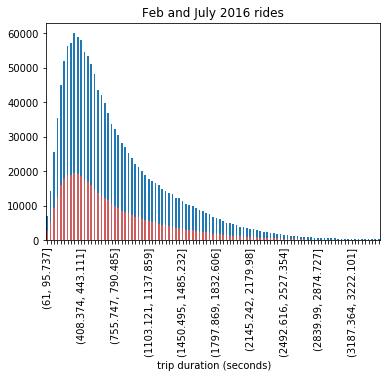

In [41]:
#code taken from Dr. Bianco's solutions
pc = np.percentile(df.tripduration, [0, 99])
bins = np.linspace(int(pc[0]), int(pc[1] / 100) * 100, 100)
dayax = df[df.duration_day].tripduration.groupby(
    pd.cut(df[df.duration_day].tripduration, bins)).\
                    agg([count_nonzero]).plot(kind='bar', legend=False)
dayax.set_title("Feb and July 2016 rides")
# plot nighttime trip duration histogram
df[~df.duration_day].tripduration.groupby(
    pd.cut(df[~df.duration_day].tripduration, bins)).\
                    agg([count_nonzero]).plot(kind='bar', legend=False, ax=dayax, 
                                             color='IndianRed')
xlab = dayax.get_xticklabels()
dayax.set_xticklabels(['' if float(i)%10 > 0 else xlab[i] for i in range(len(xlab))]);
dayax.set_xlabel(" trip duration (seconds)");

Figure 1: histogram of the distribution of the duration of rides in the day (blue) and in the night (red). I have removed the outliers in the data by only plotting till the 95th percentile. The number of rides in the day are much more than in the night, but it looks like the peak of both distributions are the same.

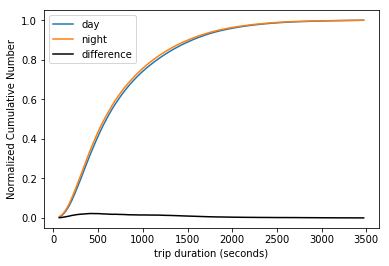

In [43]:
#taken from Dr. Bianco's solutions
#print df.ageS, df.ageS.cumsum()

day = df[df.duration_day].tripduration.groupby(pd.cut(df[df.duration_day].tripduration, 
                                                 bins)).agg([count_nonzero]).cumsum()

night = df[~df.duration_day].tripduration.groupby(pd.cut(df[~df.duration_day].tripduration, 
                                                  bins)).agg([count_nonzero]).cumsum()

#print (np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 5, day / day.max(), label = "day")
pl.plot(bins[:-1] + 5, night / night.max(), label = "night")
pl.plot(bins[:-1] + 5, np.abs(night / night.max() - day / day.max()), 'k-',
        label = "difference")
pl.xlabel("trip duration (seconds)")
pl.ylabel("Normalized Cumulative Number")
pl.legend();

Figure 2: histogram showing the cumulative distribution of trip duration by time of day (day and night). The two curves seem to be taking the same path, indicating that the distributions could be the same for night and day.

# KS tests to compare two samples

Null hypothesis: The trip duration distribution for day and night data comes from the same parent distribution.

Alternative hypothesis: The trip duration distribution for day and night data comes from different parent distributions

In [46]:
import scipy.stats

In [50]:
ks = scipy.stats.ks_2samp(df[df.duration_day].tripduration, df[~df.duration_day].tripduration)
print (ks)
if ks[1] >= alpha:
    print("The Null hypothesis that the two samples come from the same distribution cannot be rejected since p>=0.05")
else:
    print("The Null hypothesis that the two samples come from the same distribution can be rejected since p<0.05")

Ks_2sampResult(statistic=0.023365546571495865, pvalue=2.7005801832601879e-168)
The Null hypothesis that the two samples come from the same distribution can be rejected since p<0.05


# Tests for correlation

In [48]:
#Used Dr. Bianco's solutions notebook as a basis for my code.

#since there are more day rides than night rides, I'm taking a subset of the samples.
dfday = df[df.duration_day].iloc[np.random.choice(range(len(df[df.duration_day])), (~df.duration_day).sum(), 
                                      replace=False)]

Null hypothesis: The two samples of trip duration for day and night riders are from uncorrelated distributions

Alternative hypothesis: The two samples of trip duration for day and night riders are from correlated distributions

# Parsons test

In [51]:
parsons = scipy.stats.pearsonr(np.sort(dfday.tripduration), np.sort(df[~df.duration_day].tripduration))
print ("Parson's test result", parsons)
if parsons[1] >= alpha: 
    print ("The Null hypothesis that the two samples are generated from uncorrelated distributions cannot be rejected since p>=0.05")
else: 
    print ("The Null hypothesis that the two samples are generated from uncorrelated distributions can be rejected since p<0.05")

Parson's test result (0.93961082002181806, 0.0)
The Null hypothesis that the two samples are generated from uncorrelated distributions can be rejected since p<0.05


# Spearman's r test

In [53]:
spearmanr = scipy.stats.spearmanr(np.sort(dfday.tripduration), np.sort(df[~df.duration_day].tripduration))
print ("Spearman's r test result", spearmanr)
if spearmanr[1] >= alpha: 
    print ("The Null hypothesis that the two samples are generated from uncorrelated distributions cannot be rejected since p>=0.05")
else: 
    print ("The Null hypothesis that the two samples are generated from uncorrelated distributions can be rejected since p<0.05")

Spearman's r test result SpearmanrResult(correlation=0.99999934123519174, pvalue=0.0)
The Null hypothesis that the two samples are generated from uncorrelated distributions can be rejected since p<0.05
